<a href="https://colab.research.google.com/github/Tech-savvyPavithra/Data_Science-TasteCraft/blob/main/Internship_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_predict

In [ ]:
# Load dataset from your drive
# Replace 'your_dataset_path.csv' with the actual path to your dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/My Workouts/New_Yummy.csv'
data = pd.read_csv(dataset_path)
data

,Flavor Intensity,Texture Complexity,Spice Profile[0:Mild 1:Medium 2:Balanced 3:Spicy],Freshness Index,Culinary Technique Score,Aroma Richness[0:Low 1:High 2:Moderate 3:Very High],Tastiness
0,7,5,1,9,9,2,10.584
1,7,2,1,7,6,1,-4.317
2,10,4,1,7,7,1,-9.644
3,9,5,2,6,10,1,0.342
4,9,2,1,6,7,0,-11.602
...,...,...,...,...,...,...,...
9995,8,3,3,7,10,3,-0.616
9996,7,1,0,9,10,0,3.201
9997,8,4,1,9,10,0,6.657
9998,8,4,1,8,6,1,-1.846


In [ ]:
data.head()

,Flavor Intensity,Texture Complexity,Spice Profile[0:Mild 1:Medium 2:Balanced 3:Spicy],Freshness Index,Culinary Technique Score,Aroma Richness[0:Low 1:High 2:Moderate 3:Very High],Tastiness
0,7,5,1,9,9,2,10.584
1,7,2,1,7,6,1,-4.317
2,10,4,1,7,7,1,-9.644
3,9,5,2,6,10,1,0.342
4,9,2,1,6,7,0,-11.602


In [ ]:
data.tail()

,Flavor Intensity,Texture Complexity,Spice Profile[0:Mild 1:Medium 2:Balanced 3:Spicy],Freshness Index,Culinary Technique Score,Aroma Richness[0:Low 1:High 2:Moderate 3:Very High],Tastiness
9995,8,3,3,7,10,3,-0.616
9996,7,1,0,9,10,0,3.201
9997,8,4,1,9,10,0,6.657
9998,8,4,1,8,6,1,-1.846
9999,8,5,3,10,10,2,9.155


In [ ]:
data.describe()

,Flavor Intensity,Texture Complexity,Spice Profile[0:Mild 1:Medium 2:Balanced 3:Spicy],Freshness Index,Culinary Technique Score,Aroma Richness[0:Low 1:High 2:Moderate 3:Very High],Tastiness
count,10000.000000,10000.000000,10000.00000,10000.0000,10000.000000,10000.000000,10000.000000
mean,8.002800,2.995700,1.50110,8.0023,8.014300,1.484900,-1.455023
std,1.414635,1.411127,1.11612,1.4073,1.409005,1.112338,7.407056
min,6.000000,1.000000,0.00000,6.0000,6.000000,0.000000,-21.820000
25%,7.000000,2.000000,1.00000,7.0000,7.000000,0.000000,-6.808500
50%,8.000000,3.000000,2.00000,8.0000,8.000000,1.000000,-1.455000
75%,9.000000,4.000000,2.00000,9.0000,9.000000,2.000000,3.874500
max,10.000000,5.000000,3.00000,10.0000,10.000000,3.000000,18.468000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Flavor Intensity                                     10000 non-null  int64  
 1   Texture Complexity                                   10000 non-null  int64  
 2   Spice Profile[0:Mild 1:Medium 2:Balanced 3:Spicy]    10000 non-null  int64  
 3   Freshness Index                                      10000 non-null  int64  
 4   Culinary Technique Score                             10000 non-null  int64  
 5   Aroma Richness[0:Low 1:High 2:Moderate 3:Very High]  10000 non-null  int64  
 6   Tastiness                                            10000 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 547.0 KB


In [ ]:
data.shape

(10000, 7)

In [ ]:
data.size

70000

In [ ]:
data.isnull()

,Flavor Intensity,Texture Complexity,Spice Profile[0:Mild 1:Medium 2:Balanced 3:Spicy],Freshness Index,Culinary Technique Score,Aroma Richness[0:Low 1:High 2:Moderate 3:Very High],Tastiness
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

Flavor Intensity                                       0
Texture Complexity                                     0
Spice Profile[0:Mild 1:Medium 2:Balanced 3:Spicy]      0
Freshness Index                                        0
Culinary Technique Score                               0
Aroma Richness[0:Low 1:High 2:Moderate 3:Very High]    0
Tastiness                                              0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Flavor Intensity                                     10000 non-null  int64  
 1   Texture Complexity                                   10000 non-null  int64  
 2   Spice Profile[0:Mild 1:Medium 2:Balanced 3:Spicy]    10000 non-null  int64  
 3   Freshness Index                                      10000 non-null  int64  
 4   Culinary Technique Score                             10000 non-null  int64  
 5   Aroma Richness[0:Low 1:High 2:Moderate 3:Very High]  10000 non-null  int64  
 6   Tastiness                                            10000 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 547.0 KB


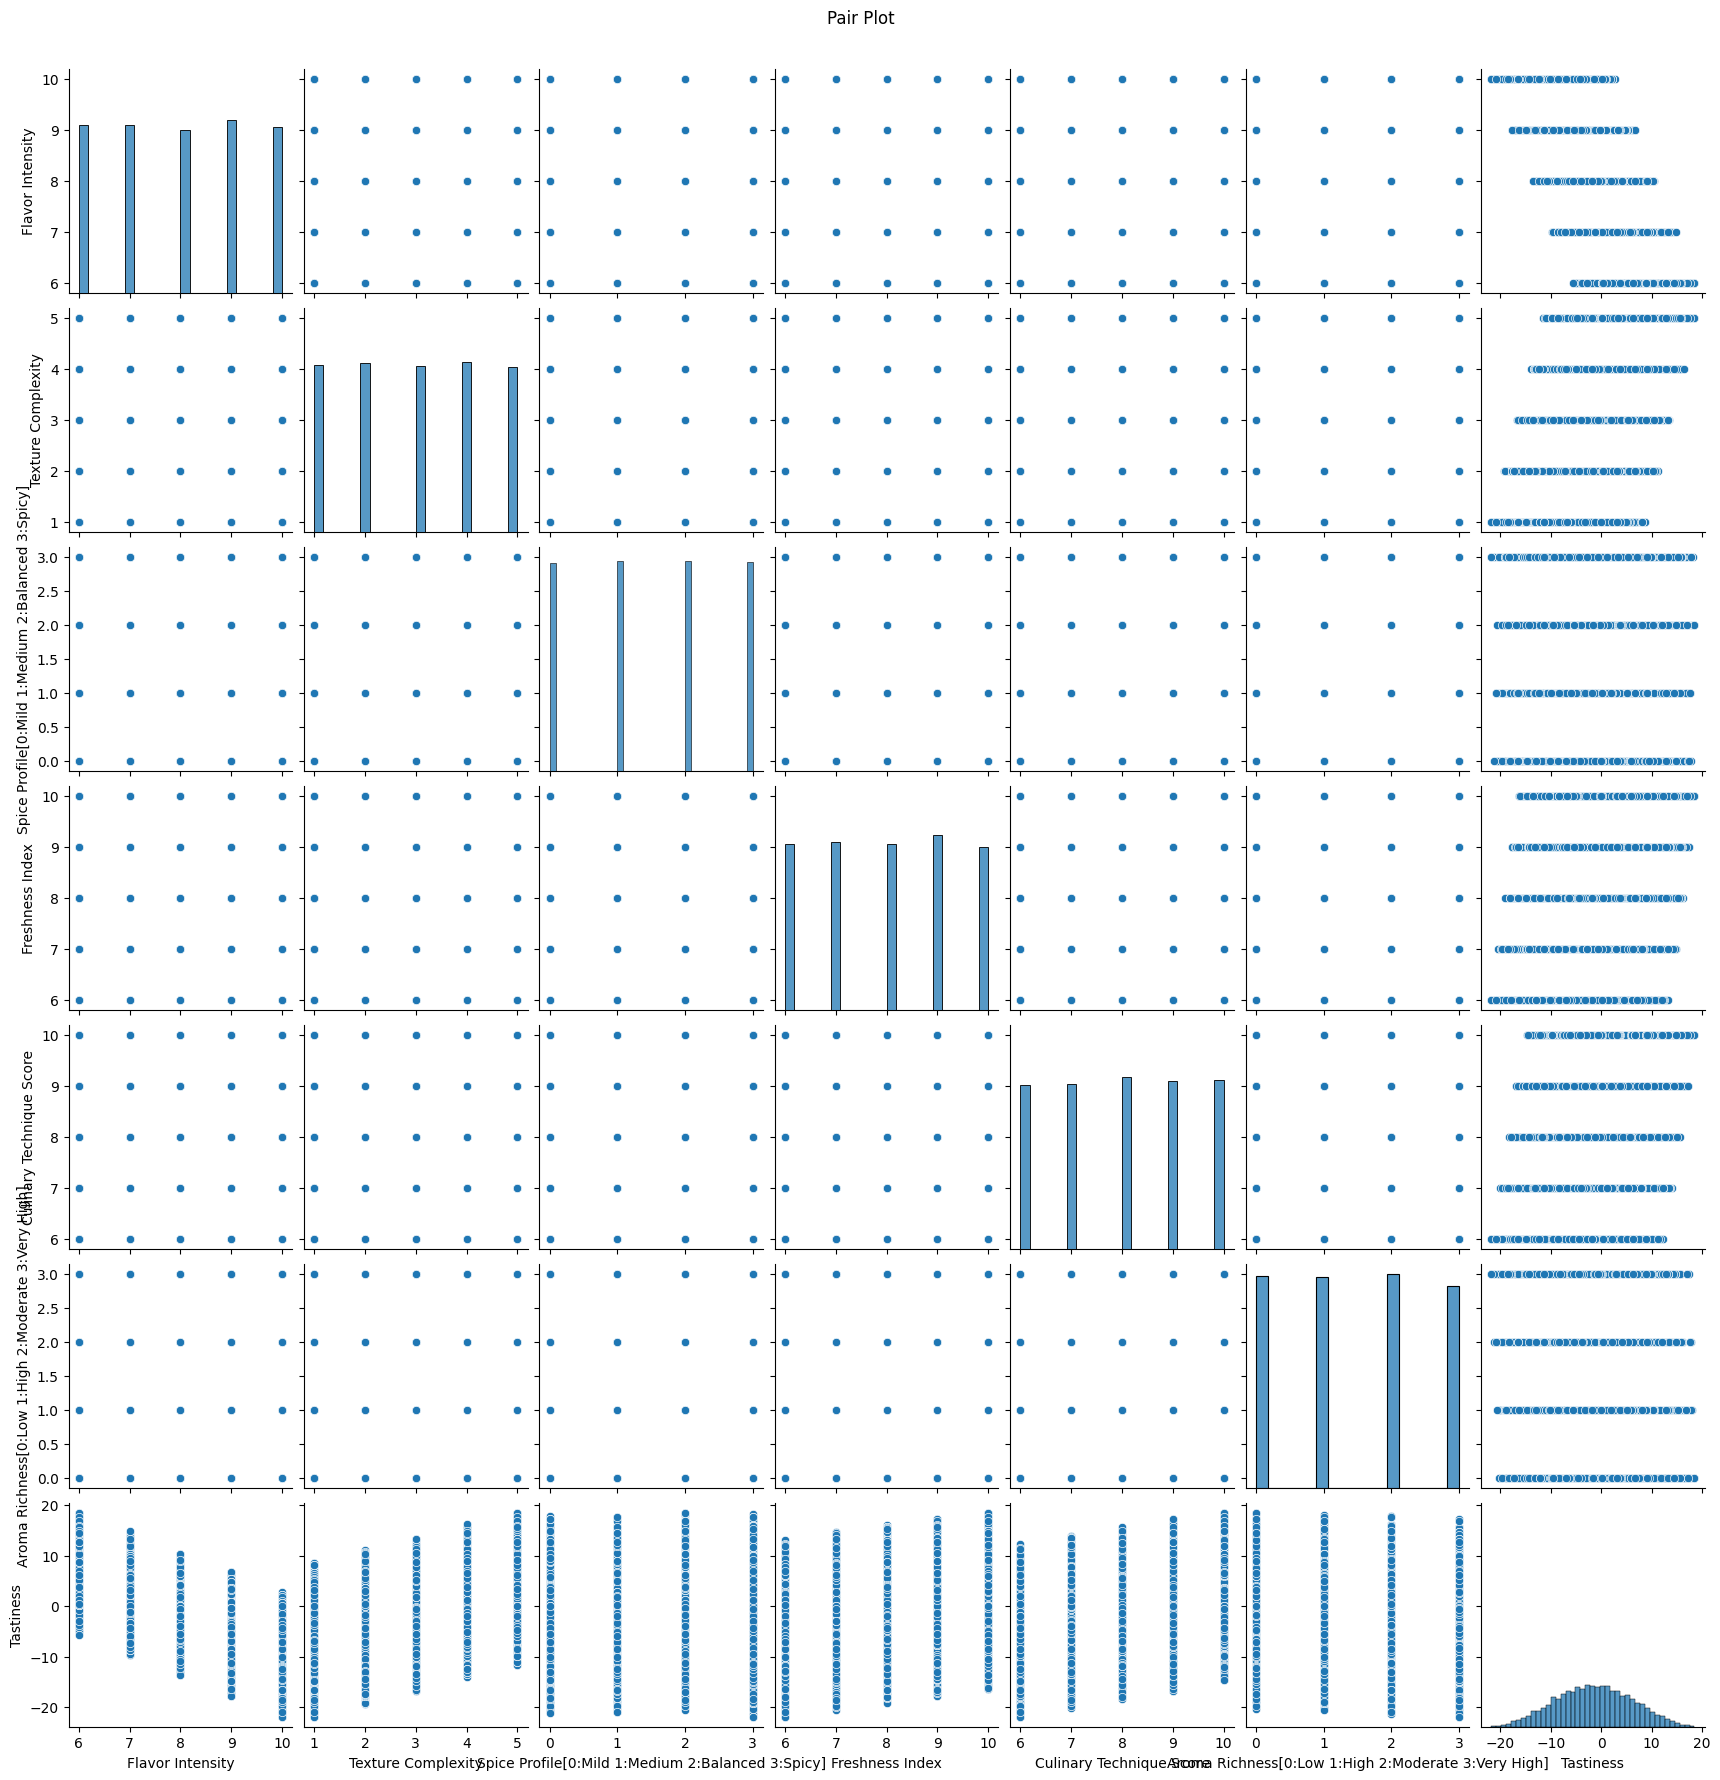

In [ ]:
# Pair plot
sns.pairplot(data)
plt.suptitle('Pair Plot', y=1.02)
plt.show()

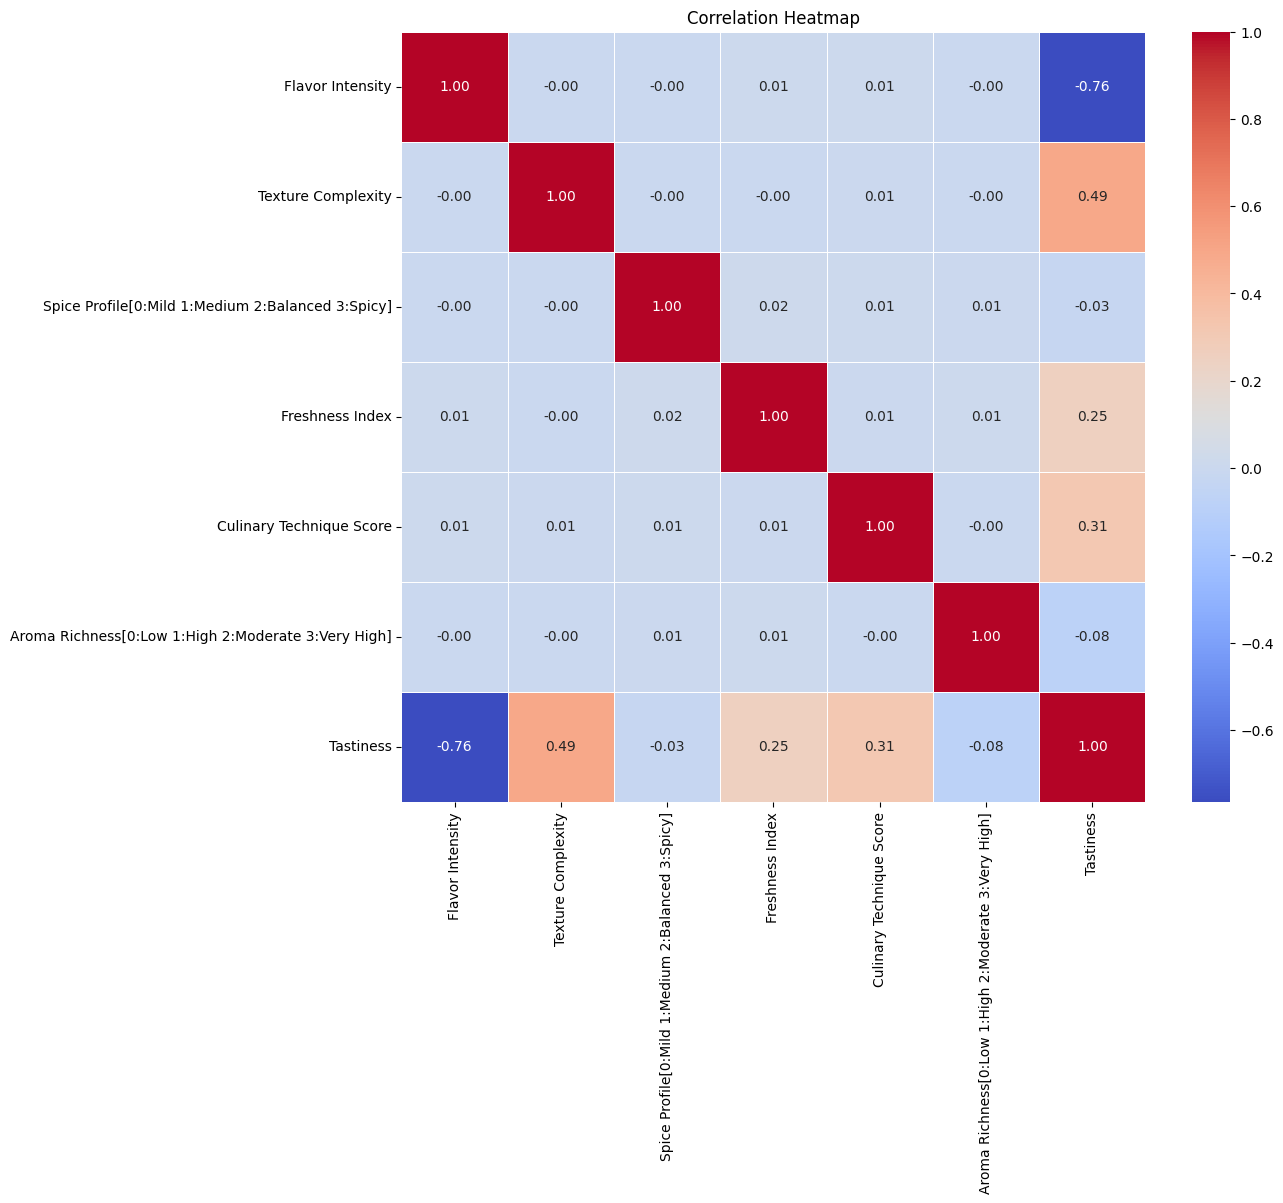

In [ ]:
# Visualize correlation between features
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Split the data into features and target
X = data.drop('Tastiness', axis=1)
y = data['Tastiness']

In [ ]:
X

,Flavor Intensity,Texture Complexity,Spice Profile[0:Mild 1:Medium 2:Balanced 3:Spicy],Freshness Index,Culinary Technique Score,Aroma Richness[0:Low 1:High 2:Moderate 3:Very High]
0,7,5,1,9,9,2
1,7,2,1,7,6,1
2,10,4,1,7,7,1
3,9,5,2,6,10,1
4,9,2,1,6,7,0
...,...,...,...,...,...,...
9995,8,3,3,7,10,3
9996,7,1,0,9,10,0
9997,8,4,1,9,10,0
9998,8,4,1,8,6,1


In [ ]:
y

0       10.584
1       -4.317
2       -9.644
3        0.342
4      -11.602
         ...  
9995    -0.616
9996     3.201
9997     6.657
9998    -1.846
9999     9.155
Name: Tastiness, Length: 10000, dtype: float64

In [ ]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [ ]:
y_pred

array([10.76096,  5.75887, -3.24685, ..., -0.86781, -4.93285, -6.02055])

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.046359960624850025
Mean Absolute Error: 0.1530483650000001
R-squared: 0.9991362792244252
Root Mean Squared Error: 0.2153136331606757


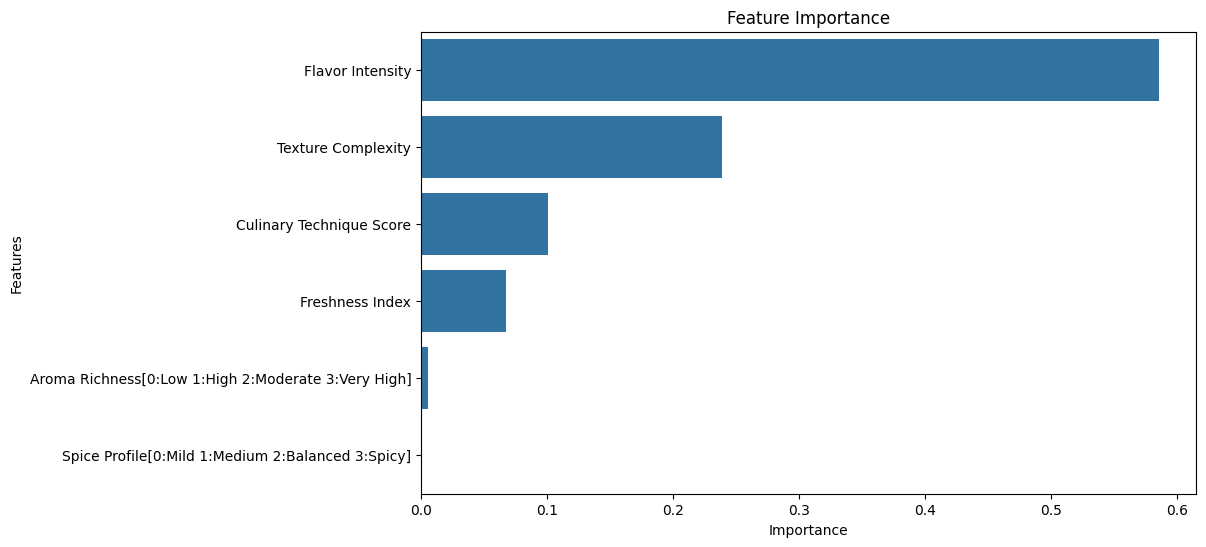

In [ ]:
# Feature importance plot
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

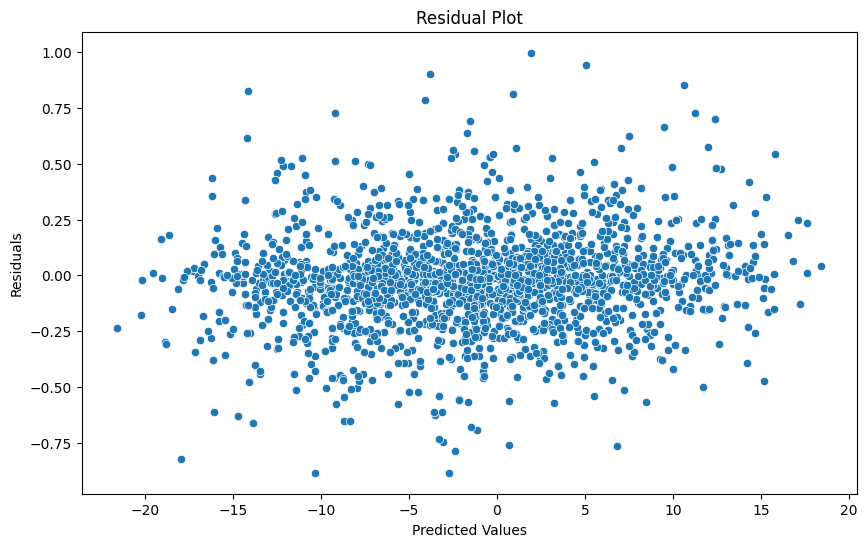

In [ ]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

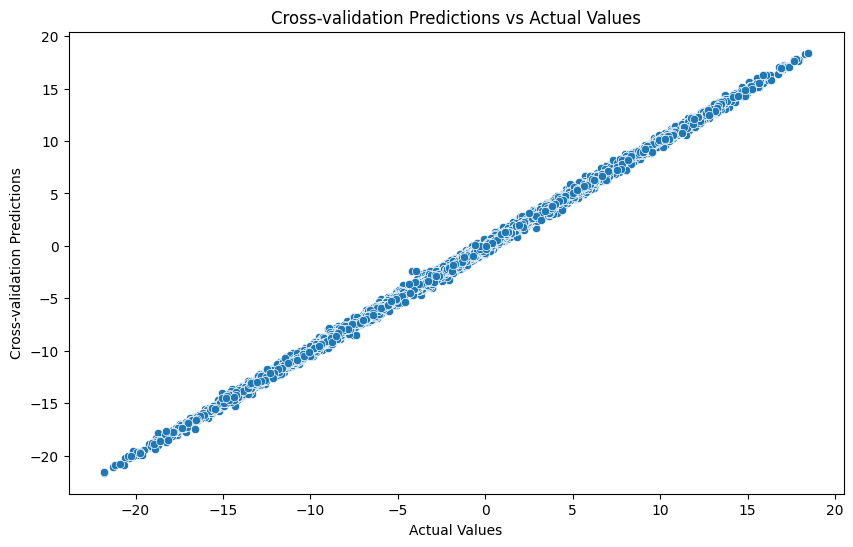

In [ ]:
# Cross-validation predictions vs. actual values
cv_pred = cross_val_predict(rf_model, X, y, cv=5)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y, y=cv_pred)
plt.title('Cross-validation Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Cross-validation Predictions')
plt.show()

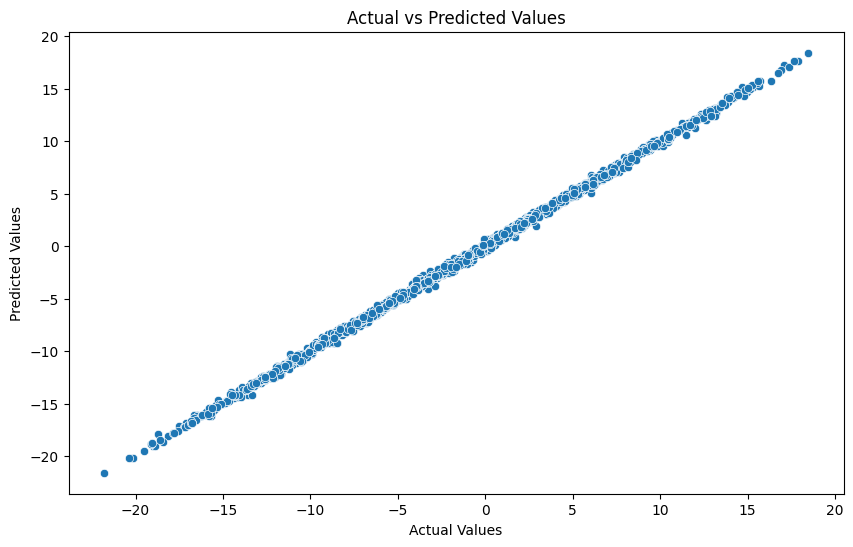

In [ ]:
# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
# Other information you might find useful
n_estimators = rf_model.n_estimators
max_depth = rf_model.max_depth
min_samples_split = rf_model.min_samples_split

print(f'\nNumber of Estimators: {n_estimators}')
print(f'Max Depth: {max_depth}')
print(f'Min Samples Split: {min_samples_split}')


Number of Estimators: 100
Max Depth: None
Min Samples Split: 2


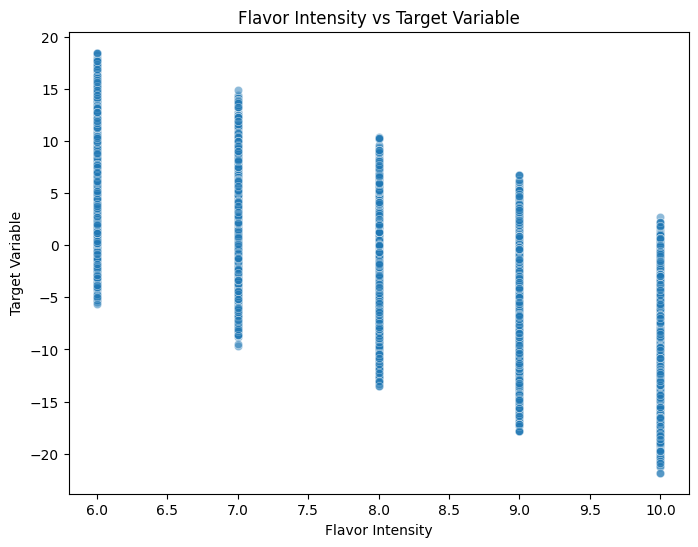

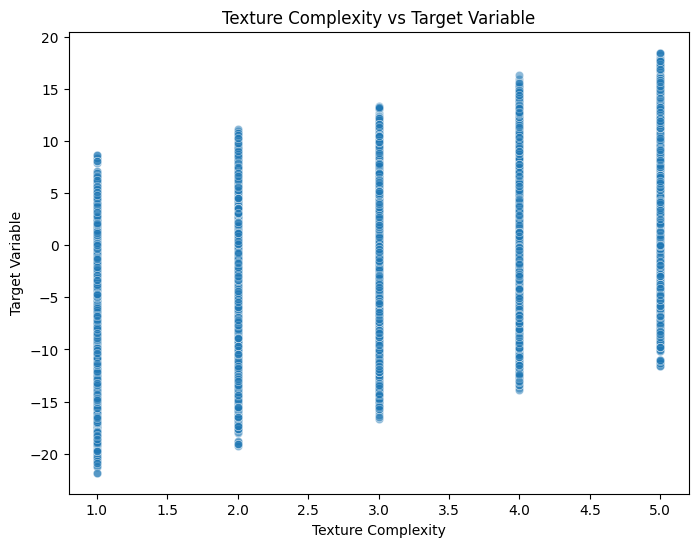

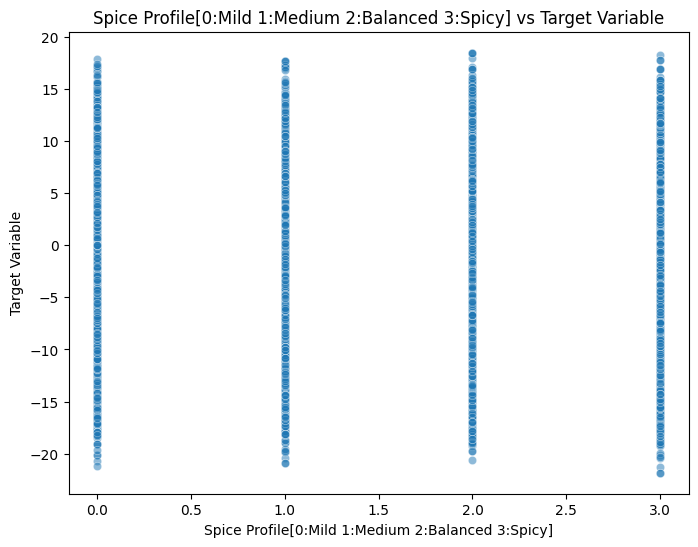

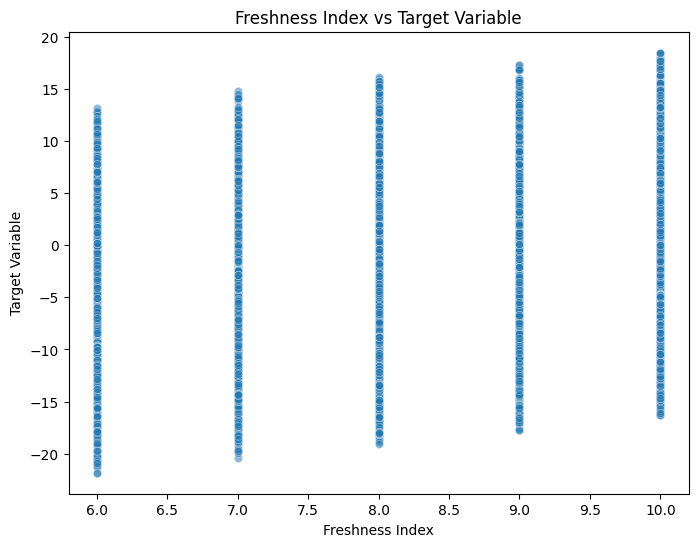

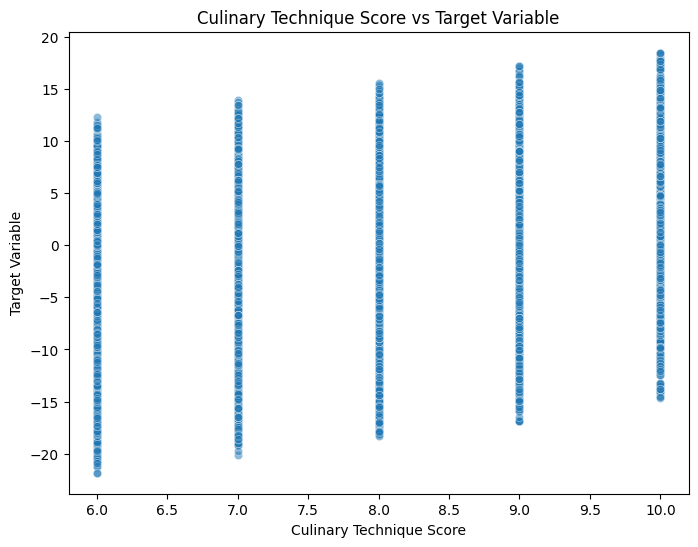

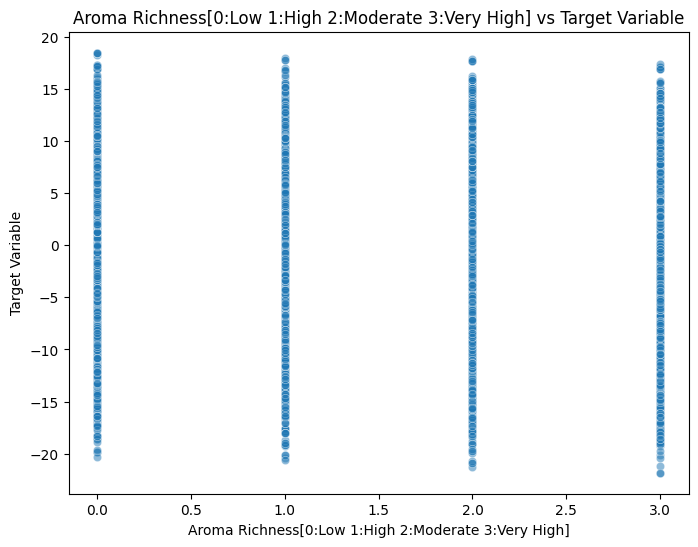

In [ ]:
# Plot each feature against the target variable
for feature in X.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[feature], y=y, alpha=0.5)
    plt.title(f'{feature} vs Target Variable')
    plt.xlabel(feature)
    plt.ylabel('Target Variable')
    plt.show()

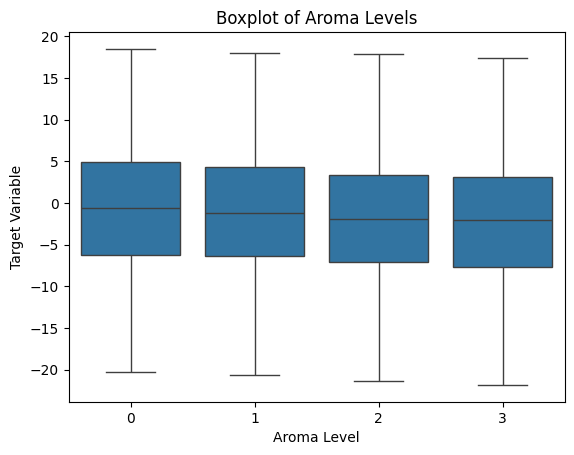

In [ ]:
import seaborn as sns

# Assuming 'aroma_column' is the name of the column in your dataset
aroma_column = 'Aroma Richness[0:Low 1:High 2:Moderate 3:Very High]'

# Create a boxplot for spice levels
sns.boxplot(x=aroma_column, y='Tastiness', data=data)
plt.xlabel('Aroma Level')
plt.ylabel('Target Variable')
plt.title('Boxplot of Aroma Levels')
plt.show()

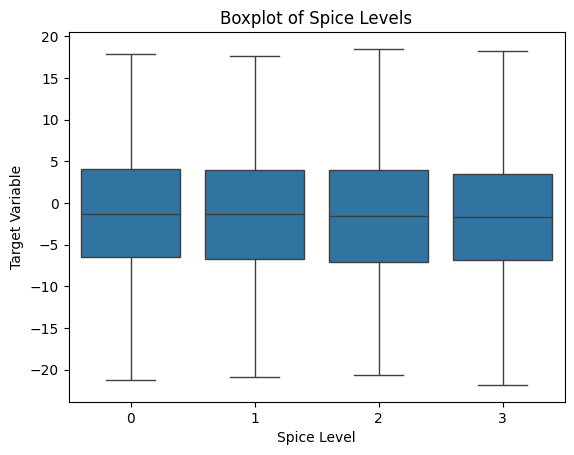

In [ ]:
import seaborn as sns

# Assuming 'spice_column' is the name of the column in your dataset
spice_column = 'Spice Profile[0:Mild 1:Medium 2:Balanced 3:Spicy]'

# Create a boxplot for spice levels
sns.boxplot(x=spice_column, y='Tastiness', data=data)
plt.xlabel('Spice Level')
plt.ylabel('Target Variable')
plt.title('Boxplot of Spice Levels')
plt.show()